<a href="https://colab.research.google.com/github/isa-dgc/ML/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Regressão Linear
- Com o conjunto de pontos como o mostrado abaixo, podemos traçar qualquer reta que passa por esses pontos:
<img src="https://drive.google.com/uc?id=1MAvsj8-PiAjITiZ5CLznoJAii9fANYxN" style="width: 400px;"/>
- Infinitas retas podem ser traçadas, mas qual seria <font color='blue'>**a melhor reta**</font> que passa por esses pontos?

- Para definir esse conceito é possível, por exemplo, verificar a distância de cada ponto a essa reta vermelha e escolher baseado nessa distância

<img src="https://drive.google.com/uc?id=14p9ICVUjch8wXoMuz2rIaxK2_7_VwewI" style="width: 500px;"/>

- A **regressão vai traçar essa reta de forma a <font color='blue'>minimizar a soma dos erros ao quadrado**</font>, de acordo com a própria documentação
    - https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
    
<img src="https://drive.google.com/uc?id=1hs6fc1WHOk6eF66MfarlmwGhxtWurUQb" style="width: 400px;"/>

In [ ]:
# Podemos considerar esses dados abaixo
import pandas as pd

dados = pd.DataFrame({
    'X': [1,2,3,4,5],
    'Y': [1.3,1.8,3.5,4,4.6]
})

dados.head(2)

,X,Y
0,1,1.3
1,2,1.8


In [ ]:
dados.head(3)

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5


In [ ]:
# Nessa reta vermelha, fizemos que y = x, então podemos escrever o y_reta como
dados['y_reta'] = dados.X

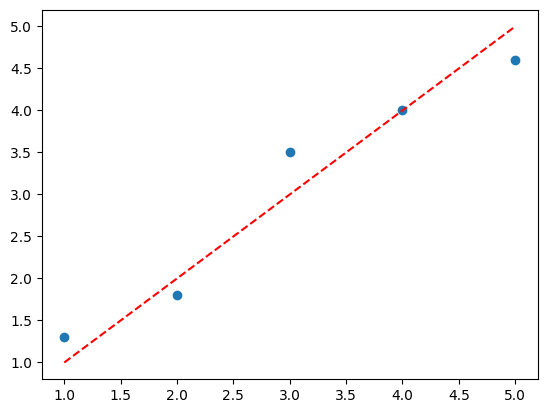

In [ ]:
# Visualizando esses pontos graficamente, podemos traçar uma reta que passa por esse pontos
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')

plt.show()

- **Vamos usar a regressão linear para traçar a melhor reta que passa por esses pontos**
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [ ]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [ ]:
# Criando o regressor
reg = LinearRegression().fit(dados.X.values.reshape(-1, 1),dados.Y)

In [ ]:
# Visualizando o coeficiente angular
a = reg.coef_[0]

In [ ]:
# e o coeficiente linear
b = reg.intercept_

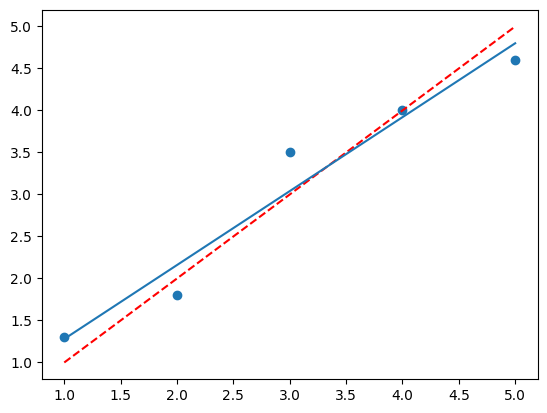

In [ ]:
# Visualizando graficamente
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')

x = dados.X.values
y = a*x+b
ax.plot(x,y)

plt.show()

In [ ]:
# Fazendo a previsão e adicionando na base
dados['y_pred'] = reg.predict(dados.X.values.reshape(-1,1))

In [ ]:
dados

,X,Y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [ ]:
# Calculando o erro da reta vermelha e da regressão
dados['erro_reta'] = (dados.Y - dados.y_reta)**2
dados['erro_pred'] = (dados.Y - dados.y_pred)**2

In [ ]:
# Verificando essa base e a soma do erro
dados[['erro_reta','erro_pred']].mean()

erro_reta    0.1080
erro_pred    0.0776
dtype: float64

- Pdemos utilizar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn para calcular esses erros
    - https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [ ]:
# Além disso, também podemos usar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# Visualizando o resultado da previsão
print(mean_absolute_error(dados.Y,dados.y_reta))
print(mean_squared_error(dados.Y,dados.y_reta))
print(mean_absolute_error(dados.Y,dados.y_pred))
print(mean_squared_error(dados.Y,dados.y_pred))

0.2800000000000001
0.10800000000000005
0.22400000000000003
0.07760000000000003


### Usando a Regressão Linear de forma prática
- **Vamos utilizar o dataset de casas da Califórnia**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [ ]:
# Importando o dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [ ]:
# Visualizando
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
# Transformando em um DataFrame
casas = pd.DataFrame(data.data)
casas.columns = data.feature_names
casas['MedHouseVal'] = data.target

In [ ]:
# Visualizando o dataframe
casas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- **Regressão Linear Simples**

In [ ]:
# Separando X e Y
X = casas.MedInc
y = casas.MedHouseVal

- Separando nossa base em treino e teste para criarmos o modelo
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train.values.reshape(-1, 1),y_train)

In [ ]:
# Avaliando o erro
y_pred = reg.predict(X_test.values.reshape(-1,1))

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6265986453094171
0.7028461448540977


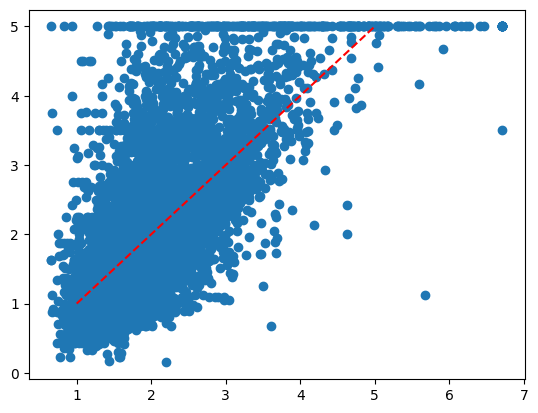

In [ ]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()

<a id='linear_multipla'></a>
- **Regressão Linear Múltipla**

- Primeiro fazendo para apenas duas variáveis

In [ ]:
# Separando X e Y
X = casas.drop('MedHouseVal',axis=1)
y = casas.MedHouseVal

In [ ]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train,y_train)

In [ ]:
# Da mesma forma, também vamos ter o coef_
reg.coef_

array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
       -7.68990809e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01])

In [ ]:
# E o intercept_
reg.intercept_

-37.082010939079986

In [ ]:
# Avaliando o erro
y_pred = reg.predict(X_test)

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.5295710106684446
0.5369686543372453


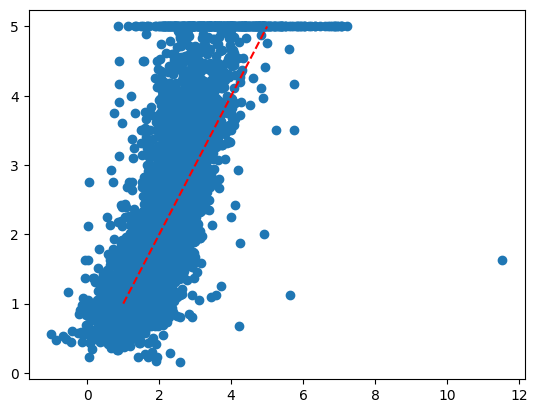

In [ ]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()

- Podemos [voltar](#linear_multipla) e considerar qualquer coluna para o modelo